## Focusing on the individuals representation
- PCA is about representing at best a high dimensional dataset into a smaller dimensional space
- this is done by preserving the distance between individuals
- we can judge the factorial representation by comparing distances between individuals in the factorial plane vs the total dimension

- the questions to ask is then:
	- 	what are the books that are best represented on the factorial plane
	- 	what are the books that have contributed the most to the factorial plane's construction

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plots_lib import plot_pca_scatter

In [34]:
column_name = ['title', 'author', 'listPrice', 'amazonPrice', 'cover', 'npages',
       'publisher', 'year', 'isbn', 'height', 'width', 'thick', 'weight', 'F0',
       'F1', 'F2', 'F3', 'F4']

active_var = ['npages', 'height', 'width', 'thick', 'weight']
PCs = ['F0','F1','F2','F3','F4']

df = pd.read_csv('amazon-books-factorial.csv', index_col=0)

df_std = pd.read_csv('amazon-books-continuous-standardised.csv', index_col=0)
df_std = df_std.drop(['listPrice', 'amazonPrice'], axis=1)

df_factor = df.drop(['title', 'author', 'listPrice', 'amazonPrice', 'cover', 'npages',
       'publisher', 'year', 'isbn', 'height', 'width', 'thick', 'weight'], axis=1)

lambdas = [2.57566692, 1.5052551,  0.18289299, 0.22592685, 0.49418097]
df_factor

,F0,F1,F2,F3,F4
0,0.458122,-0.123102,-0.074774,0.075819,0.203002
1,0.833099,0.372038,-0.008811,-0.422771,-0.365396
2,2.376919,0.830385,-0.095829,0.020505,-0.662710
3,-3.900695,-0.478621,-0.249021,0.308558,0.136813
4,-2.711045,-1.638028,-0.708986,-0.037368,0.078171
...,...,...,...,...,...
306,-1.558431,1.875908,0.689638,1.050837,-0.019375
307,0.716115,1.574863,0.438733,-0.372882,-0.484059
308,1.226166,0.148016,0.179128,-0.234472,-0.118350
309,-2.429710,3.880067,-0.480307,-1.998906,0.525937


### first lets analyse de representation of our individuals:
we use for that de squarred cosine wich is nothing more than the distance form the origin in a factorial axis normalised by the distance from the origin in the original data matrix
if the PCA is done well, the sum of the squarred cosine of one individual across all fatcorial axis should be equal to 1.
the squarred cosine is representative of the angle between the datapoint $z_i$ in the original space $R^n$ and the projection of the datapoint onto the factorial axis $F_{ki}$
$$
COS^2(z_i, F_k) = \frac{F_{ki}}{d^2(z_i)}
$$

In [35]:
Z = np.array(df_std)
d_squared = np.sum(df_std**2, axis=1)

F = np.array(df_factor)

factor_dist = F**2

cos2 = np.zeros_like(factor_dist)

for i in range(len(factor_dist)):
    cos2[i] = factor_dist[i] / d_squared[i]
    
print(cos2.shape)

# to check the validity of the cosine
# print(np.sum(cos2, axis=1))



(311, 5)


In [36]:
cos2_label = [f'COS2_{i}' for i in range(cos2.shape[1])]

cos2_df = pd.DataFrame(cos2, columns=cos2_label)

df = pd.concat([df, cos2_df], axis=1)

In [37]:
df.head()

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,...,F0,F1,F2,F3,F4,COS2_0,COS2_1,COS2_2,COS2_3,COS2_4
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,7.8,...,0.458122,-0.123102,-0.074774,0.075819,0.203002,0.756093,0.054593,0.020143,0.020709,0.148461
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,8.4,...,0.833099,0.372038,-0.008811,-0.422771,-0.365396,0.606270,0.120906,0.000068,0.156129,0.116627
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,8.3,...,2.376919,0.830385,-0.095829,0.020505,-0.662710,0.832305,0.101581,0.001353,0.000062,0.064699
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,8.8,...,-3.900695,-0.478621,-0.249021,0.308558,0.136813,0.974071,0.014665,0.003970,0.006095,0.001198
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,8.0,...,-2.711045,-1.638028,-0.708986,-0.037368,0.078171,0.697118,0.254493,0.047677,0.000132,0.000580


##### The best represented books on the two first factorial axis:
- first impression: it feels like a tradeof, either the point is well represented on the first axis and not on the second and vice versa.
- this seem logical, since they add up to one.

In [38]:
result = df[['COS2_0', 'COS2_1']].sum(axis=1)
sorted_indices = result.sort_values(ascending=True).index
sorted_by_cos = df.loc[sorted_indices]

sorted_by_cos.iloc[0:10]

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,...,F0,F1,F2,F3,F4,COS2_0,COS2_1,COS2_2,COS2_3,COS2_4
255,The Maze Runner,Dashner,9.99,9.99,P,400.0,Delacorte Press,2010,385737955,8.2,...,-0.028808,0.017935,-0.700613,-0.009388,-0.132055,0.001629,0.000631,0.963343,0.000173,0.034224
76,Final Harvest: Poems,Dickinson,14.99,10.19,H,352.0,Back Bay Books,1964,316184152,5.6,...,0.186295,0.236619,0.029072,-0.573603,4.258638,0.001870,0.003017,0.000046,0.017731,0.977336
291,This is a Book,Demitri Martin,24.99,14.69,H,288.0,Grand Central Publishing,2011,892967412,5.1,...,0.079576,0.373816,0.090734,0.220532,4.953839,0.000256,0.005647,0.000333,0.001966,0.991798
204,The blind-side,Michael Lewis,13.95,8.50,P,352.0,W.W.norton & company,2009,039000838X,8.4,...,-0.007678,0.044226,0.013614,-0.338295,-0.279722,0.000302,0.010036,0.000951,0.587226,0.401484
207,The Bookseller of Kabul,Seierstad,13.99,10.68,P,288.0,Back Bay Books,2004,316159417,5.5,...,0.573775,0.421166,0.052711,-0.313847,4.312134,0.017145,0.009237,0.000145,0.005130,0.968344
274,The Sonnets and A Lovers Complaint,William Shakespeare,20.00,13.60,H,272.0,Penguin Classics,2010,141192577,8.0,...,-0.069314,0.091958,0.415082,0.253108,0.259513,0.015157,0.026679,0.543573,0.202116,0.212475
195,The Absolutely True Diary of a Part-Time Indian,Sherman Alexie,11.99,7.70,P,288.0,"Little, Brown Books for Young Readers",2009,316013692,5.5,...,0.792127,0.500204,-0.137820,-0.366455,4.280696,0.032418,0.012927,0.000981,0.006938,0.946735
50,Catcher in the Rye,JD Salinger,13.99,8.38,P,288.0,Back Bay Books,2001,316769177,5.2,...,1.145703,0.006015,0.184089,-0.741736,4.366455,0.062618,0.000002,0.001617,0.026245,0.909519
268,The Scarlet Letter,Hawthorne,7.77,7.77,P,140.0,Tribeca Books,2011,1612930026,7.8,...,0.364736,-0.138501,0.839820,1.185040,-0.041765,0.058771,0.008474,0.311586,0.620399,0.000771
143,Oedipus the King,E.A. Sophocles,6.95,6.95,P,92.0,CreateSpace,2010,1453626409,7.8,...,0.516145,-0.019789,1.023848,1.328146,-0.046476,0.086462,0.000127,0.340214,0.572496,0.000701


In [39]:
bad_result = result[result < 0.20]
best_result = result[result > 0.90]
bad_represented = df.loc[bad_result.index]
best_represented = df.loc[best_result.index]


### We have 20 books that are represented at less than 20% by the two first axis, lets check if there is a pattern

In [40]:
bad_represented[['title', 'author', 'listPrice', 'amazonPrice', 'cover', 'npages',
       'publisher', 'year', 'isbn', 'height', 'width', 'thick', 'weight']]

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,width,thick,weight
7,A Confederacy of Dunces,John Kennedy Toole,15.00,8.44,P,405.0,Grove Weidenfeld,1987,802130208,8.2,5.3,0.8,11.2
47,Cat's Cradle: A Novel,Kurt Vonnegut,26.95,20.48,H,287.0,Turtleback,1998,808520695,8.1,5.3,1.0,12.2
50,Catcher in the Rye,JD Salinger,13.99,8.38,P,288.0,Back Bay Books,2001,316769177,5.2,8.0,0.9,5.6
65,Drowning Ruth: A Novel,Christina Schwarz,15.00,10.20,P,368.0,Ballantine Books,2001,345439104,8.2,5.6,0.8,9.6
76,Final Harvest: Poems,Dickinson,14.99,10.19,H,352.0,Back Bay Books,1964,316184152,5.6,8.2,1.0,10.4
82,"Game Change: Obama and the Clintons, McCain an...",John Heilemann and Mark Halperin,27.99,11.20,H,464.0,Harper,2010,61733636,9.1,6.0,1.7,1.2
86,God in the Dock: Essays on Theology and Ethics,Lewis,18.00,12.24,P,346.0,William B. Eerdmans Publishing Company,1994,802808689,8.5,5.4,0.8,14.1
119,Lives of Girls and Women: A Novel,Alice Munro,15.00,10.33,P,288.0,Vintage,2001,375707492,8.0,5.2,0.6,16.0
143,Oedipus the King,E.A. Sophocles,6.95,6.95,P,92.0,CreateSpace,2010,1453626409,7.8,5.1,1.0,16.0
150,Patterns of Culture,Ruth Benedict,15.00,10.09,P,320.0,Mariner Books,2006,618619550,8.2,5.5,0.9,12.0


In [41]:
from summaries import continuous_variable_summary 

bad_rep_summary = continuous_variable_summary(bad_represented, ['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight'])
bad_rep_summary


,mean,median,variance,std_dev,min,max
listPrice,16.475,15.000,35.853216,5.987755,6.95,27.99
amazonPrice,10.949,10.195,10.987315,3.314712,6.95,20.48
npages,324.300,320.000,10095.800000,100.477858,92.00,560.00
height,7.570,8.150,1.822211,1.349893,5.10,9.30
width,6.195,5.550,1.525763,1.235218,5.10,8.50
thick,0.970,0.900,0.068526,0.261775,0.60,1.70
weight,10.660,11.600,23.254105,4.822251,1.20,16.00


In [42]:
best_rep_summary = continuous_variable_summary(best_represented, ['listPrice', 'amazonPrice', 'npages', 'height', 'width', 'thick', 'weight'])
best_rep_summary

,mean,median,variance,std_dev,min,max
listPrice,17.010370,14.99,175.253369,13.238330,1.50,139.95
amazonPrice,12.122741,10.19,150.475838,12.266859,0.77,139.95
npages,321.037037,255.00,39819.200111,199.547488,32.00,896.00
height,8.205185,8.00,0.892436,0.944688,6.30,12.10
width,5.499259,5.30,0.858283,0.926436,4.10,9.20
thick,0.868148,0.70,0.195321,0.441952,0.20,2.00
weight,12.437778,8.80,64.877891,8.054681,2.40,35.20


### Now lets check the contributions of our individuals:

- contribution is the metric that allow you to appreciate how much a specific individual participate in the construction of a factorial axis.
- it is the share of inertia that it contain with respect to the total inertia of the axis
$$
CONTR(z_i, F_k) = \frac{p_i*F_{ki}}{\lambda_k}
$$
where $p_i$ equals the weight, in our case $1/n$

In [43]:
n, p = F.shape[0], F.shape[1]
CONTR = np.zeros_like(F)

CONTR_label = []
for ax in range(p):
    CONTR_label.append(f'CONTR_{ax}')
    CONTR[:, ax] = ((F[:, ax]**2 * (1/n))/lambdas[ax]) * 100

contr_df = pd.DataFrame(CONTR, columns=CONTR_label)

# print('checking: ')
# for i in range(len(CONTR_label)):
# 	print(contr_df[f'CONTR_{i}'].sum())


df = pd.concat([df, contr_df], axis=1)
df

,title,author,listPrice,amazonPrice,cover,npages,publisher,year,isbn,height,...,COS2_0,COS2_1,COS2_2,COS2_3,COS2_4,CONTR_0,CONTR_1,CONTR_2,CONTR_3,CONTR_4
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010,1605506249,7.8,...,0.756093,0.054593,0.020143,0.020709,0.148461,0.026201,0.003237,0.009830,0.008181,0.026813
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008,1416564195,8.4,...,0.606270,0.120906,0.000068,0.156129,0.116627,0.086645,0.029567,0.000136,0.254379,0.086872
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995,486285537,8.3,...,0.832305,0.101581,0.001353,0.000062,0.064699,0.705308,0.147295,0.016145,0.000598,0.285760
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008,61564893,8.8,...,0.974071,0.014665,0.003970,0.006095,0.001198,1.899477,0.048934,0.109022,0.135502,0.012179
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011,307265722,8.0,...,0.697118,0.254493,0.047677,0.000132,0.000580,0.917537,0.573155,0.883727,0.001987,0.003976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004,60572345,9.3,...,0.322625,0.467461,0.063178,0.146687,0.000050,0.303197,0.751714,0.836151,1.571601,0.000244
307,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011,1429233443,9.1,...,0.144097,0.696908,0.054087,0.039069,0.065840,0.064020,0.529804,0.338409,0.197885,0.152458
308,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005,031233446X,8.0,...,0.924389,0.013470,0.019728,0.033802,0.008612,0.187693,0.004680,0.056412,0.078244,0.009114
309,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010,393934942,10.7,...,0.231861,0.591285,0.009061,0.156929,0.010864,0.736985,3.215939,0.405584,5.686650,0.179979


##### What are the most contributive individuals, are there any pattern ? 

In [44]:
sort0 = df.sort_values(by='CONTR_0', ascending=False, inplace=False)
sort1 = df.sort_values(by='CONTR_1', ascending=False, inplace=False)



In [45]:
sort0['weight_gram'] = sort0['weight']* 28.35
sort1['weight_gram'] = sort1['weight']* 28.35

best_repr_0 = sort0[['title', 'cover', 'listPrice', 'amazonPrice'] + active_var + ['weight_gram']].iloc[0:20]
best_repr_1 = sort1[['title', 'cover', 'listPrice', 'amazonPrice'] + active_var + ['weight_gram']].iloc[0:20]
sum0 = continuous_variable_summary(best_repr_0, active_var)
sum1 = continuous_variable_summary(best_repr_1, active_var)


#### According to our variables analysis, we can see that the books that contribute the most to the creation of the first factorial plane are the heaviest book, with the most pages and thus the biggest thickness

#### the height and widht of those books are pretty close to the mean of the all dataset

In [46]:
sum0

,mean,median,variance,std_dev,min,max
npages,495.850,548.50,88318.344737,297.184025,24.0,896.0
height,8.145,8.40,2.053132,1.432875,5.7,11.0
width,5.610,5.85,1.271474,1.127596,4.1,9.0
thick,1.295,1.50,0.317342,0.563331,0.2,2.0
weight,21.760,25.60,126.490947,11.246819,1.6,35.2


In [47]:
sum1

,mean,median,variance,std_dev,min,max
npages,352.150,344.00,79630.976316,282.189611,32.0,896.0
height,8.780,8.75,2.971158,1.723705,6.6,12.1
width,6.485,6.75,3.924500,1.981035,4.1,9.3
thick,0.915,0.90,0.309763,0.556564,0.1,2.0
weight,15.145,14.40,77.711026,8.815386,1.6,35.2


#### I note that the individual that contributed the most is not especially the best represented !!
- how to explain that ?

(311, 5) (311,)


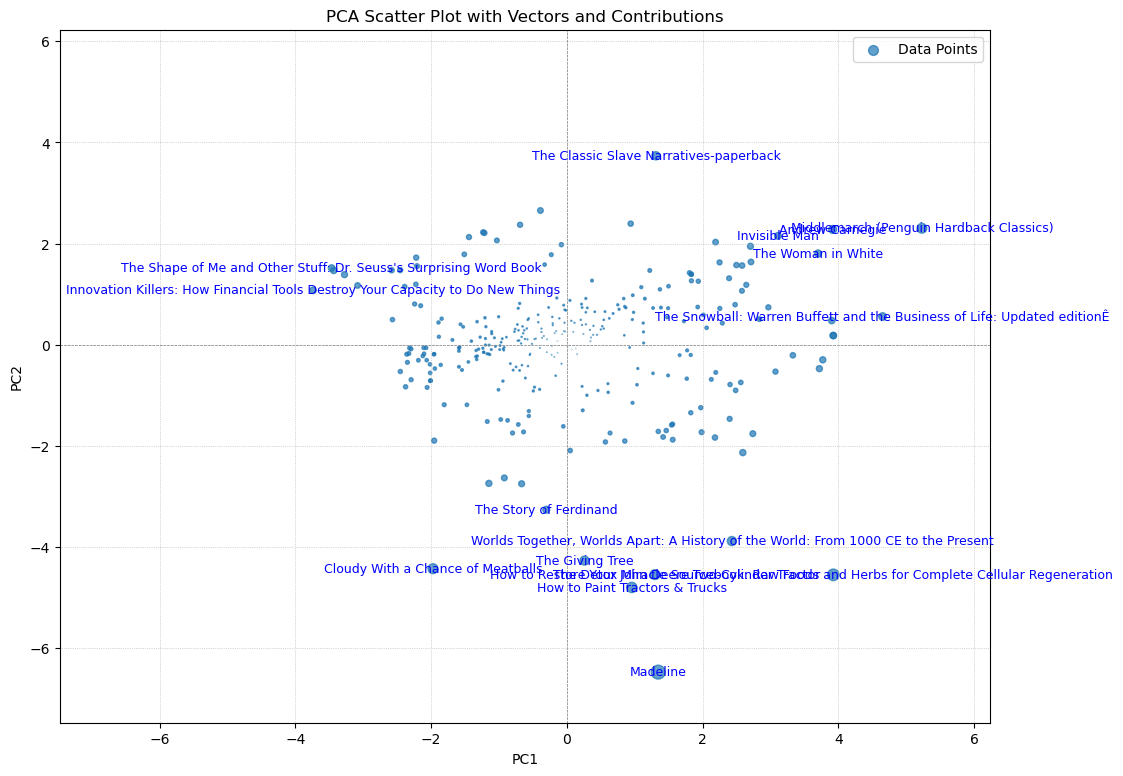

In [50]:
F = np.array(df[PCs])
contr = np.array(df[['CONTR_0', 'CONTR_1']].sum(axis=1))
print(F.shape, contr.shape)

plot_pca_scatter(F*-1, contribution=contr, data_label=list(df['title']), display_treshold=5, figsize=(12, 9))

In [51]:
best_repr_0

,title,cover,listPrice,amazonPrice,npages,height,width,thick,weight,weight_gram
131,Middlemarch (Penguin Hardback Classics),H,20.00,12.17,880.0,7.9,5.4,2.0,35.2,997.92
273,The Snowball: Warren Buffett and the Business ...,P,20.00,13.60,832.0,9.2,5.9,1.5,32.0,907.20
218,The Detox Miracle Sourcebook: Raw Foods and He...,P,30.00,20.00,384.0,11.0,9.0,1.0,32.0,907.20
83,Game of Thrones,P,17.00,10.46,720.0,9.1,6.2,1.5,27.2,771.12
10,A Game of Thrones: A song of fire and ice,P,17.00,10.46,720.0,9.1,6.2,1.5,27.2,771.12
31,Andrew Carnegie,P,20.00,13.60,896.0,8.0,5.4,1.8,22.4,635.04
3,1421: The Year China Discovered America,P,15.99,10.87,672.0,8.8,6.0,1.6,28.8,816.48
5,1861: The Civil War Awakening,H,28.95,16.44,460.0,8.9,6.3,1.7,32.0,907.20
105,Innovation Killers: How Financial Tools Destro...,P,8.95,8.95,64.0,6.3,4.2,0.2,2.4,68.04
300,Unbroken,H,27.00,13.49,496.0,9.4,6.3,1.7,28.0,793.80


In [52]:
best_repr_1

,title,cover,listPrice,amazonPrice,npages,height,width,thick,weight,weight_gram
124,Madeline,H,17.99,10.58,54.0,12.1,9.2,0.5,17.6,498.960
96,How to Paint Tractors & Trucks,P,27.95,19.99,144.0,10.8,8.4,0.5,17.6,498.960
218,The Detox Miracle Sourcebook: Raw Foods and He...,P,30.00,20.00,384.0,11.0,9.0,1.0,32.0,907.200
97,How to Restore Your John Deere Two-Cylinder Tr...,P,139.95,139.95,160.0,10.6,8.2,0.5,22.4,635.040
54,Cloudy With a Chance of Meatballs,P,6.99,6.99,32.0,8.5,9.3,0.1,1.6,45.360
227,The Giving Tree,H,18.99,11.16,64.0,10.3,7.9,0.5,16.0,453.600
309,"Worlds Together, Worlds Apart: A History of th...",P,97.50,97.50,480.0,10.7,8.9,0.9,14.4,408.240
210,The Classic Slave Narratives-paperback,H,7.95,7.95,688.0,6.6,4.1,1.7,11.2,317.520
278,The Story of Ferdinand,H,17.99,10.88,72.0,9.4,7.4,0.5,14.4,408.240
93,Hop on Pop,H,8.99,8.99,72.0,9.3,6.7,0.4,14.4,408.240
